<a href="https://colab.research.google.com/github/GabyLeon10100/MujeresDigitales/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de los clientes en una cadena de supermercados

In [1]:
#Importamos las librerias necesarias para el proyecto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime as dt

**INTRODUCCIÓN**

---
**Contexto empresarial:** Una cadena de supermercados desea saber que segmento de clientes es más probable que compre cierto producto y solo comercializarlo en ese segmento en particular. Para ello requiere comprender mejor las necesidades, comportamientos y preocupaciones de los diferentes tipos de clientes.

**Problema empresarial:** Analizar los datos proporcionados y proporcionar estadisticas para la creacion correcta de la campaña. Brindando visualizaciones que respondan a las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico:** Se proporciona un archivo CSV que contiene detalles sobre cada cliente como fecha de nacimiento,ingresos, ubicación geografica del cliente, número de compras realizadas a través del sitio web de la empresa, etc. El delimitador en el archivo CSV dado es; en lugar del predeterminado,. Realizará las siguientes tareas con los datos:

* Leer, transformar y preparar datos para su visualización

* Realizar análisis y construir visualizaciones de los datos para identificar patrones

El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

Tenemos las siguientes columnas:

*   **ID**= Identificacion unica del cliente.
*   **Year_Birth**= Año de nacimiento del cliente.
*   **Marital_Status**= Estado civil.
*   **Income**= Ingreso familiar anual del cliente.
*   **Kidhome**= Número de niños en el hogar del cliente.
*   **Teenhome**= Número de adolescentes en el hogar del cliente
*   **Dt_Customer**= Fecha de inscripción del cliente en la empresa.
*   **Recency**= Número de días desde la última compra del cliente
*   **MntWines**= Cantidad gastada en vino en los últimos 2 años
*   **MntFruits**= Cantidad gastada en frutas en los últimos 2 años
*   **MntMeatProducts**= Cantidad gastada en carne en los últimos 2 años
*   **MntFishProducts**= Cantidad gastada en pescado en los últimos 2 años
*   MntSweetProducts= Cantidad gastada en dulces en los últimos 2 años
*   **MntGoldProds**=Cantidad gastada en oro en los últimos 2 años
*   **NumDealsPurchases**= Número de compras realizadas con descuento
*   **NumWebPurchases**= Número de compras realizadas a través del sitio web de la empresa
*   **NumCatalogPurchases**= Número de compras realizadas mediante catálogo
*   **NumStorePurchases**=Número de compras realizadas directamente en tiendas
*   **NumWebVisitsMonth**= Número de visitas al sitio web de la empresa en el último mes
*   **AcceptedCmp3**=1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario
*   **AcceptedCmp4**= 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario
*   **AcceptedCmp5**=1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario
*   **AcceptedCmp1**=1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario
*   **AcceptedCmp2**=1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario
*   **Response**= 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario
*   **Complain**= 1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario
*   **Country**= Ubicación del cliente


## Analizado los datos - columnas


In [2]:
#Asigmos un DataFrame con el nombre data, con los datos de la tienda
data=pd.read_csv('marketing_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [3]:
#Obtenemos la cantidad de registros por columna y tipo de dato
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
data.shape #cantidad de registros y de columnas.

(2240, 28)

In [5]:
data.columns = data.columns.str.replace(' ', '',regex=True) #Reemplazar en las columnas los dos espacios por vacio.
data['Income'] = data['Income'].str.replace('$', '',regex=True)#Reemplazar en la columna Income el signo peso por vacio.
data['Income'] = data['Income'].str.replace(',','').astype('float')#Reemplazar en la columna Income la coma de los registros por vacio y convertirlos a tipo float.

In [6]:
#Buscamos si hay campos nulos en alguno de los campos que tenemos en los datos
data.isnull().sum().sort_values(ascending=False)#Sustituir valores nulos por True si es nulo o False si no lo es y sumarlos. Ordenar de mayor cantidad a menor.

Income                 24
Country                 0
Complain                0
Year_Birth              0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
ID                      0
dtype: int64

In [7]:
data['Income']=data['Income'].fillna(data['Income'].median())#Sustituye en la columna Income los valores nulos por el valor mediano para evitar 
#el efecto de valores atipico
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


# Parte 1: ¿Como ha flutuado el número de compras durante los ultimos dos años? ¿Han aumentado con el tiempo? ¿Cual es el producto más comprado?

En esta parte, vamos a identificar como ha sido las compras a lo largo de los dos años, por medio de las compras online, directamente con la tienda y como se comporta en los diferentes países donde tiene comercio la tienda.


In [8]:
#Vamos a identificar cuanto(cantidad) ha vendido la tienda en los diferentes productos
cantidad_vino = data['MntWines'].sum() #Cantidad de vino
cantidad_fruta = data['MntFruits'].sum() #Cantidad de frutas
cantidad_carne = data['MntMeatProducts'].sum() #Cantidad de carne
cantidad_pescado = data['MntFishProducts'].sum() #Cantidad de pescado
cantidad_dulces = data['MntSweetProducts'].sum() #Cantidad de dulces
cantidad_oro = data['MntGoldProds'].sum() #Cantidad de oro

In [9]:
#Creamos el DataFrame
valores = pd.DataFrame()

#Asignamos las columnas del DataFrame
valores['productos'] = None
valores['cantidad'] = None

#Creamos campos, para llenar el DataFrame
productos = ['Vino', 'Fruta', 'Carne', 'Pescado', 'Dulce', 'Oro']
cantidad = [cantidad_vino, cantidad_fruta, cantidad_carne, cantidad_pescado, cantidad_dulces, cantidad_oro]

#Llenamos el DataFrame
valores['productos'] = productos
valores['cantidad'] = cantidad
valores

,productos,cantidad
0,Vino,680816
1,Fruta,58917
2,Carne,373968
3,Pescado,84057
4,Dulce,60621
5,Oro,98609


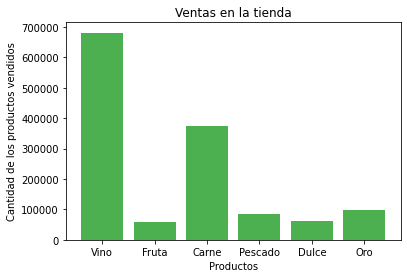

In [10]:
#Creamos la grafica de barras sobre la compra de los productos
valores = valores[["productos", "cantidad"]]
x = valores.productos
y = valores.cantidad
plt.bar(x, y, color = "#4CAF50")
plt.title("Ventas en la tienda")
plt.xlabel("Productos")
plt.ylabel("Cantidad de los productos vendidos")
plt.show()

En la grafica podemos apreciar que el producto que más se vende en la tienda es el Vino y la menos apreciada por los clientes es la fruta y dulce, que tienen valores muy bajos



In [11]:
#Sacamos el total de compras
purchases_col=[col for col in data.columns if 'Purchase' in col]#variable para las columnas que contienen la palabra 'Purchase' sumar aplicado en forma de filas.
data['TotalPurchases']=data[purchases_col].sum(axis=1)

In [12]:
#Identificamos los países donde se ofrecen los productos
data['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [13]:
#Agregamos una nueva columna a nuestro DataFrame con los nombres de los países
data['paises'] = data['Country'] #Asignamos los mismos valores que el campo Country para que la modificacion de los datos sea mas rapida
data['codigo'] = data['Country']

data['paises'] = data['Country'].replace({'SP': 'ESPAÑA', 'CA': 'CANADA', 'US': 'ESTADOS UNIDOS', 'AUS': 'AUSTRALIA', 'GER': 'ALEMANIA', 'IND': 'INDIA', 'SA': 'SUDAFRICA', 'ME': 'MEXICO', })
data['codigo'] = data['Country'].replace({'SP': '1', 'CA': '2', 'US': '3', 'AUS': '4', 'GER': '5', 'IND': '6', 'SA': '7', 'ME': '8'})
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalPurchases,paises,codigo
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,15,ESPAÑA,1
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,18,CANADA,2
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,11,ESTADOS UNIDOS,3
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,4,AUSTRALIA,4
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,8,ESPAÑA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,20,ESTADOS UNIDOS,3
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,5,ESPAÑA,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,14,ESPAÑA,1
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,20,INDIA,6


In [14]:
#Para la columna Country le cambiamos los codigos, a un codigo general de los países
data['Code_country'] = data['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'MEX'})
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalPurchases,paises,codigo,Code_country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,15,ESPAÑA,1,ESP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,18,CANADA,2,CAN
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,11,ESTADOS UNIDOS,3,USA
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,4,AUSTRALIA,4,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,8,ESPAÑA,1,ESP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,20,ESTADOS UNIDOS,3,USA
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,5,ESPAÑA,1,ESP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,14,ESPAÑA,1,ESP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,20,INDIA,6,IND


In [77]:
vino = data.groupby('paises').MntWines.sum()
fruta = data.groupby('paises').MntFruits.sum()
carne = data.groupby('paises').MntMeatProducts.sum()
pescado = data.groupby('paises').MntFishProducts.sum()
dulce = data.groupby('paises').MntSweetProducts.sum()
oro = data.groupby('paises').MntGoldProds.sum()

paises
ALEMANIA           37483
AUSTRALIA          44372
CANADA             84647
ESPAÑA            337111
ESTADOS UNIDOS     32351
INDIA              36233
MEXICO              1729
SUDAFRICA         105900
Name: MntWines, dtype: int64

In [79]:
compra = pd.DataFrame()
compra['paises'] = ["ALEMANIA", "AUSTRALIA", "CANADA", "ESPAÑA", "EEUU", "INDIA", "MEXICO", "SUDAFRICA"]
compra['Wine'] = [vino[0], vino[1], vino[2], vino[3], vino[4], vino[5], vino[6], vino[7]]
compra['Fruit'] = [fruta[0], fruta[1], fruta[2], fruta[3], fruta[4], fruta[5], fruta[6], fruta[7]]
compra['Meat'] = [carne[0], carne[1], carne[2], carne[3], carne[4], carne[5], carne[6], carne[7]]
compra['Fish'] = [pescado[0], pescado[1], pescado[2], pescado[3], pescado[4], pescado[5], pescado[6], pescado[7]]
compra['Sweet'] = [dulce[0], dulce[1], dulce[2], dulce[3], dulce[4], dulce[5], dulce[6], dulce[7]]
compra['Gold'] = [oro[0], oro[1], oro[2], oro[3], oro[4], oro[5], oro[6], oro[7]]
compra

,paises,Wine,Fruit,Meat,Fish,Sweet,Gold
0,ALEMANIA,37483,3062,20874,4767,2870,5857
1,AUSTRALIA,44372,3884,23097,5834,4608,7968
2,CANADA,84647,7745,46146,10027,7677,12282
3,ESPAÑA,337111,28299,178454,40156,30148,46027
4,EEUU,32351,3028,18634,4420,2882,4850
5,INDIA,36233,3782,23746,4822,3219,6010
6,MEXICO,1729,8,817,226,122,220
7,SUDAFRICA,105900,8923,56650,13653,9017,15114


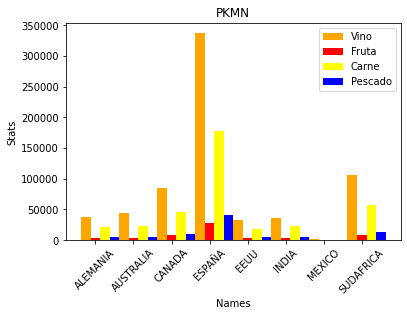

In [97]:
labels = compra['paises']
x = np.arange(len(labels))
width = 0.25

plt.bar(x - width, compra['Wine'], label='Vino', width=width, color='orange')
plt.bar(x, compra['Fruit'], label='Fruta', width=width, color='red')
plt.bar(x + width , compra['Meat'], label='Carne', width=width, color='yellow')
plt.bar(x + width + width, compra['Fish'], label='Pescado', width=width, color='blue')
#plt.plot(x - width, pk['Attack'][:13], color="blue", label="ATK Line")
#plt.plot(x, pk['HP'][:13], color="purple", label="HP Line")
#plt.plot(x + width, pk['Defense'][:13], color="lightblue", label="DEF Line")
plt.title("PKMN")
plt.xlabel("Names")
plt.ylabel("Stats")
plt.xticks(rotation=45, ticks=x, labels=labels)
plt.legend()

In [ ]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True);
plt.subplots_adjust(wspace=0.5);

In [15]:
#Necesitamos agrupar los paises y sacar el número de compras
df_compras = data.groupby(['codigo', 'Code_country'])['TotalPurchases'].sum()
#Pasamos los datos a una lista
lista = [list(key) + [str(value)] for key, value in  df_compras.to_dict().items()]
#Pasamos los datos a un dataframe
df_compras = pd.DataFrame()
for x in lista:
  agregar = {}
  agregar = {"Pais" : x[0], "Codigo": x[1], "Total_compras": x[2]}
  df_compras = df_compras.append(agregar, ignore_index=True)
df_compras['Pais'] = df_compras['Pais'].replace({'1':'ESPAÑA', '2':'CANADA', '3':'ESTADOS UNIDOS', '4':'AUSTRALIA', '5':'ALEMANIA', '6':'INDIA', '7':'SUDAFRICA', '8':'MEXICO'})
df_compras

,Codigo,Pais,Total_compras
0,ESP,ESPAÑA,16052
1,CAN,CANADA,4101
2,USA,ESTADOS UNIDOS,1761
3,AUS,AUSTRALIA,2314
4,GER,ALEMANIA,1788
5,IND,INDIA,2099
6,ZAF,SUDAFRICA,5117
7,MEX,MEXICO,59


In [16]:
# Creacion del mapa
fig = px.choropleth(df_compras, locationmode='ISO-3', color ='Total_compras', hover_name="Pais",
                    locations='Codigo', projection='natural earth', title='Número total de compra por país'
                   )
fig.show()

# Parte 2: ¿Cual es la preferencia del cliente en las compras segun los datos?

Averiguar las preferencias de los clientes por diferentes situaciones del mismo como la edad, nivel educativo, estado civil, cantidad de Kids/Teens e ingresos recibidos, tambien averiguar las preferencias del cliente en los descuentos

In [17]:
#Obtenemos el año actual en el cual estamos trabajando
date = dt.today()
year = date.strftime("%Y")
year = int(year)
year

2021

In [18]:
#Tenemos crear un nuevo campo en el DataFrame que nos de la edad, debido a que solos nos da los años de nacimiento de los clientes
data['edad'] = year - data['Year_Birth']
data['edad'].unique()

array([ 51,  60,  63,  54,  32,  67,  74,  42,  62,  40,  52,  44,  61,
        55,  45,  56,  65,  46,  50,  35,  49,  47,  31,  34,  37,  53,
        66,  38,  48,  43,  69,  59,  57,  39,  58,  64,  41,  76,  72,
        73,  68,  75,  36,  29,  77,  70,  33,  71,  27,  28,  30, 128,
        25,  26, 122,  78,  80,  81, 121])

In [19]:
#Como hay clientes que tienen una edad superior a 100, lo vamos a eliminar
data = data[data.edad<100]
data = data.reset_index(drop=True)
data['edad'].unique()

array([51, 60, 63, 54, 32, 67, 74, 42, 62, 40, 52, 44, 61, 55, 45, 56, 65,
       46, 50, 35, 49, 47, 31, 34, 37, 53, 66, 38, 48, 43, 69, 59, 57, 39,
       58, 64, 41, 76, 72, 73, 68, 75, 36, 29, 77, 70, 33, 71, 27, 28, 30,
       25, 26, 78, 80, 81])

In [20]:
age_distribution = data['edad'].value_counts()#cantidad de personas con la misma edad

In [21]:
age_places=data.groupby('edad').mean()[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]#numero de compras por edad
fields2=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

# Parte 4: ¿Cual campaña tuvo mayor acogida entre los clientes?

In [115]:
df_cam = data[['Code_country', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].melt(
    id_vars='Code_country', var_name='Campaign', value_name='Accepted (%)')
df_cam = pd.DataFrame(df_cam.groupby(['Code_country', 'Campaign'])['Accepted (%)'].mean()*100).reset_index(drop=False)

In [116]:
df_cam['Campaign'] = df_cam['Campaign'].replace({'AcceptedCmp1': '1',
                                                'AcceptedCmp2': '2',
                                                'AcceptedCmp3': '3',
                                                'AcceptedCmp4': '4',
                                                'AcceptedCmp5': '5',
                                                'Response': 'Most recent'
                                                })

In [125]:
fig = px.choropleth(df_cam, locationmode='ISO-3', color='Accepted (%)', facet_col='Campaign', facet_col_wrap=2,
                    facet_row_spacing=0.05, facet_col_spacing=0.01, width=700,
                    locations='Code_country', projection='natural earth', title='Advertising Campaign Success Rate by Country')
fig.show()

TypeError: ignored

# Parte 5: ¿Que porcentaje de clientes realizan compras por catalogo, via online y directamente con la tienda?

Se quiere verificar en que medio los clientes prefieren realizar sus compras con la tienda

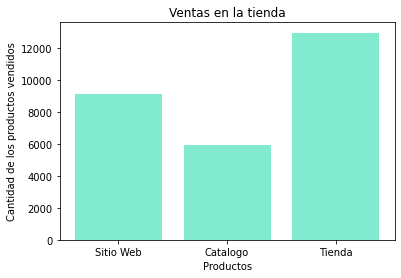

In [22]:
#Creamos la grafica de barras donde detectamos donde se compra más
#valores = valores[["productos", "cantidad"]]
x = ['Sitio Web', 'Catalogo', 'Tienda']
y = [data['NumWebPurchases'].sum(), data['NumCatalogPurchases'].sum(), data['NumStorePurchases'].sum()]
plt.bar(x, y, color = "#82eace")
plt.title("Ventas en la tienda")
plt.xlabel("Productos")
plt.ylabel("Cantidad de los productos vendidos")
plt.show()

Como podemos apreciar, en la tienda se presentan más ventas presenciales y debería reforzar más las ventas por medio del catalogo.

# Parte 6: ¿Cual es la recompra en relacion al ingreso?

In [23]:
#Punto de relacion de ingresos con recompra
data['Frecuencia_compra'] = data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']+data['NumDealsPurchases']

In [24]:
data = data[data['Income']<150000]#ingresos menores a 150.000
data = data.reset_index(drop=True)

In [25]:
data['Dependientes'] = data['Kidhome']+data['Teenhome']

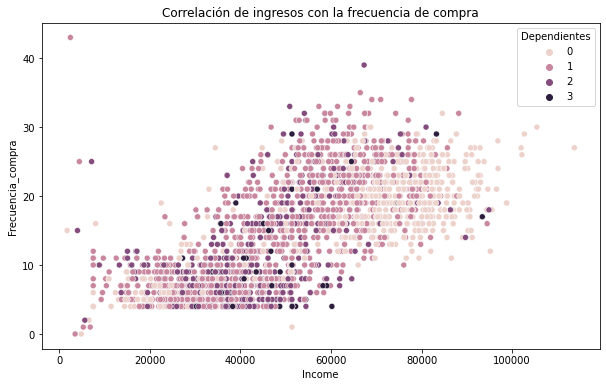

In [26]:
plt.figure(figsize=(10,6))#Relacion entre ingresos y la frecuencia de compra
sns.scatterplot(data=data, x='Income', y='Frecuencia_compra',hue='Dependientes')
plt.title("Correlación de ingresos con la frecuencia de compra")
plt.show()

Existe una correlación positiva entre los ingresos de los clientes y la frecuencia de compra.
La mayoría de los compradores de alta frecuencia no tienen más de dos hijos.
La mayoría de los clientes de altos ingresos (más de $ 80000) no tienen hijos

# Parte 7: ¿Cual es el lifetime value del cliente?

# Parte 8: ¿Cual es el nivel de sastifaccion del cliente con los productos que ofrece la tienda durante los dos ultimos años?

# Parte 9: ¿Qué factores están relacionados significativamente con la cantidad de compras en la tienda?

In [27]:
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer']) #variable que necesita una transformacion. Convertir de formato objet a tipo fecha.
data['Dt_Customer']

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2224   2013-03-07
2225   2013-01-22
2226   2012-12-03
2227   2012-11-29
2228   2012-09-01
Name: Dt_Customer, Length: 2229, dtype: datetime64[ns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



KeyError: ignored

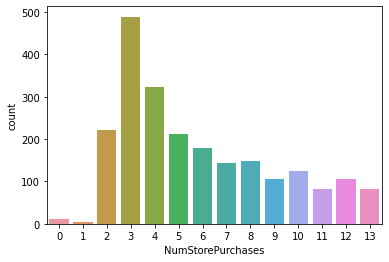

In [29]:
#variable objetivo
sns.countplot(data['NumStorePurchases']);
#Identificación única para cada cliente
#Dt_Customer se eliminará a favor del uso de la variable diseñada Year_Customer
data.drop(columns=['ID', 'Dt_Customer'], inplace=True)

#una codificación en caliente para características categóricas
from sklearn.preprocessing import OneHotEncoder

cat=data.select_dtypes(exclude=np.number)
print("Number of unique values per categorical features:\n", cat.nunique())

#utilizar un codificador en caliente
enc=OneHotEncoder(sparse=False).fit(cat)
cat_encoded=pd.DataFrame(enc.transform(cat))
cat_encoded.columns=enc.get_feature_names(cat.columns)

# fusionar con datos numéricos
num=data.drop(columns=cat.columns)
df2=pd.concat([cat_encoded,num],axis=1)
df2.head()


#datos de prueba
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=df2.drop(columns='NumStorePurchases')
y=df2['NumStorePurchases']

X_train,X_test, y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=1)

model=LinearRegression()
model.fit(X_train,y_train)

preds=model.predict(X_test)
print("Linear Regression Model RMSE:", np.sqrt(mean_squared_error(y_test,preds)))
print("Median value of target variable:", y.median())

#Resultado:
#Interpretación de los resultados utilizando la importancia de la permutación:
import eli5
from eli5.sklearn import PermutationImportance

perm=PermutationImportance(model, random_state=1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names=X_test.columns.tolist(),top=5)
#Las características importantes son:
#'TotalPurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases

#Recomendaciones:
#El número de compras en la tienda aumenta con un mayor número de compras totales.
#El número de compras en la tienda disminuye con un mayor número de compras por catálogo, web o ofertas.
#Interpretación:
#Los clientes que más compran en las tiendas son los que compran menos a través del catálogo, el sitio web o las ofertas especiales.